![Facial Recognition](facialrecognition.jpg)

You are a member of an elite group of data scientists, specialising in advanced facial recognition technology, this firm is dedicated to identifying and safeguarding prominent individuals from various spheres—ranging from entertainment and sports to politics and philanthropy. The team's mission is to deploy AI-driven solutions that can accurately distinguish between images of notable personalities and the general populace, enhancing the personal security of such high-profile individuals. You're to focus on Arnold Schwarzenegger, a figure whose accomplishments span from bodybuilding champion to Hollywood icon, and from philanthropist to the Governor of California. 

### **The Data**
The `data/lfw_arnie_nonarnie.csv` dataset contains processed facial image data derived from the "Labeled Faces in the Wild" (LFW) dataset, focusing specifically on images of Arnold Schwarzenegger and other individuals not identified as him. This dataset has been prepared to aid in the development and evaluation of facial recognition models. There are 40 images of Arnold Schwarzenegger and 150 of other people.

| Column Name | Description |
|-------------|-------------|
| PC1, PC2, ... PCN | Principal components from PCA, capturing key image features. |
| Label | Binary indicator: `1` for Arnold Schwarzenegger, `0` for others. |

In [1]:

import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("data/lfw_arnie_nonarnie.csv")

X = df.drop('Label', axis=1)
y = df['Label'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

In [2]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,Label
0,-2.061987,0.581320,-0.249115,-0.631340,-1.359899,0.751619,-0.029364,1.610456,0.341402,1.286709,0.708114,0.532856,0.120662,-0.233355,-1.044630,0.708812,0.102934,-0.646379,0.079747,0.259006,-0.823252,-0.073053,0.000012,-0.889346,0.102545,0.429773,0.325874,-0.154608,0.249043,0.734776,-0.557264,-0.125949,-0.085757,0.219186,-0.598182,0.686688,-0.454214,-0.349097,0.427917,-0.430217,...,0.192106,-0.200329,-0.084005,0.170044,0.088048,0.046566,-0.138270,-0.082937,-0.152811,0.017811,0.073691,0.018255,0.059794,0.125830,-0.040191,-0.016609,0.101636,0.373098,-0.112695,-0.310741,0.118343,-0.029749,-0.184334,0.106879,-0.102218,0.220604,-0.161994,-0.017457,-0.225212,0.275103,-0.356844,-0.016488,-0.228473,0.258134,0.046834,0.135742,-0.068297,0.022038,0.090003,1
1,-0.796838,-0.667228,-0.107889,0.019755,-0.686348,0.912779,0.463412,-0.238308,-0.294023,0.215470,0.396033,0.590155,0.127292,-0.554574,-0.743637,0.362179,-0.872961,0.076257,1.125764,-0.575236,-0.607877,0.379153,-0.347103,-0.659013,-0.449097,0.341072,0.937572,-0.089466,0.480191,0.111528,-0.158382,1.037095,-0.091880,-0.322881,-0.468454,-0.252643,0.581741,-0.225666,0.511933,0.114880,...,-0.573384,0.047608,0.199231,-0.337638,-0.412542,0.357298,0.007240,-0.096339,0.128999,0.004475,0.350419,-0.271911,0.095161,-0.101089,0.114538,-0.056913,-0.064404,0.146814,0.442595,0.184349,-0.231899,-0.385522,-0.145551,-0.269373,-0.143683,-0.043807,0.094818,0.275936,0.302230,0.233808,-0.037243,-0.012105,-0.351285,-0.034968,0.192314,-0.015406,-0.089117,0.023588,-0.019998,1
2,5.376779,1.142695,2.543111,-2.727212,0.272785,-0.972187,1.111221,1.645502,-2.556968,-0.648781,-0.430632,0.576847,0.761946,-0.661188,-0.804289,-0.332128,-0.632490,-0.440453,-0.427574,0.890283,0.192748,0.066656,-0.197127,-1.128692,-0.472366,0.006519,0.071720,-0.057759,-0.392824,0.487612,0.364861,-0.738375,-0.551977,0.687852,0.006524,0.641928,0.328818,-0.316963,-0.364977,0.350749,...,0.302920,0.150084,-0.160967,-0.144635,-0.013547,-0.185011,-0.005928,0.165310,-0.179431,0.079075,0.206602,0.101385,-0.284894,0.085361,0.006436,0.016880,-0.134763,0.053844,0.044114,0.171145,-0.306689,0.141176,0.183336,-0.025694,0.222032,-0.075223,-0.244048,-0.092831,0.039170,0.143808,0.157441,-0.333875,-0.303720,-0.085975,0.171346,0.128577,-0.118262,0.045881,-0.190158,1
3,7.029235,1.242883,-2.628079,1.224479,-1.141370,-1.620647,0.205890,1.567561,0.736200,0.010782,0.382048,0.457527,1.053649,-0.225129,0.746109,0.951153,2.139957,0.222731,0.352131,-0.369624,-0.428360,0.609554,0.468331,0.674288,0.629100,-0.238961,-0.237057,-0.900939,-0.465342,0.001495,1.744428,0.216003,0.046028,-0.390643,-0.334763,0.462395,-0.059341,0.238659,0.381685,-0.465571,...,-0.251696,0.490606,0.291392,-0.146119,0.078534,-0.441927,-0.193707,-0.244864,0.285215,0.053636,-0.143409,0.096032,0.045515,0.321206,-0.107726,-0.118376,-0.113556,-0.162301,0.193297,-0.021270,-0.056994,0.259568,0.428184,-0.351284,-0.075552,0.223227,0.125803,-0.374172,-0.023798,0.213687,0.051040,-0.068796,0.141841,-0.227999,0.046044,0.013643,-0.125893,0.146396,0.013320,1
4,5.484822,6.752706,-4.291114,1.740412,-1.603087,-1.075175,1.919936,-0.197615,1.030596,1.451936,-0.418098,0.319124,1.584174,0.728954,-0.913203,-1.363856,0.079728,-1.085581,-1.534230,0.948659,-0.119705,-0.313430,-0.243191,0.593084,0.032255,-0.082904,0.369117,0.423439,0.845681,0.216275,0.516234,-0.566205,0.459498,0.223092,-0.564321,1.080568,0.822447,0.139215,-1.596073,-0.131355,...,-0.065716,-0.291799,0.196658,0.045446,-0.320277,-0.168644,0.040963,0.159333,-0.011565,-0.253465,-0.223389,-0.080398,-0.208127,-0.107232,0.020327,0.078007,0.120614,0.526614,0.081479,0.210342,-0.083386,-0.101139,0.261650,0.115369,-0.247231,0.182866,0.174559,0.269726,-0.213112,-0.028310,0.034412,0.265141,0.226000,0

In [3]:

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

models = {"LogisticRegression": LogisticRegression(), 
          "KNeighborsClassifier": KNeighborsClassifier(),
          "DecisionTreeClassifier": DecisionTreeClassifier()}

In [4]:

param_grid = {"LogisticRegression": {"LogisticRegression__C": [0.01, 0.1, 1, 10]},
              "KNeighborsClassifier": {"KNeighborsClassifier__n_neighbors": range(1,10)},
              "DecisionTreeClassifier": {"DecisionTreeClassifier__max_depth": [2, 5, 10],
           "DecisionTreeClassifier__min_samples_split": [2, 5, 10, 20],
           "DecisionTreeClassifier__random_state": [42]}}

In [5]:

kf = KFold(n_splits=5, random_state=42, shuffle=True)

pipe_accuracies = {}
pipe_params = {}
pipelines = {}

In [6]:
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ("scaler", StandardScaler()),
        (name, model)
    ])
    
    grid_search = GridSearchCV(pipeline, param_grid[name], cv=kf, scoring="accuracy")
    
    
    grid_search.fit(X_train, y_train)
    pipe_accuracies[name] = grid_search.best_score_
    pipe_params[name] = grid_search.best_params_
    pipelines[name] = grid_search

Best Model: LogisticRegression
Best Model Parameters: {'LogisticRegression__C': 1}
Best Model CV Score: 0.8288172043010752
Accuracy: 0.8158
Precision: 1.0000
Recall: 0.1250
F1 Score: 0.2222


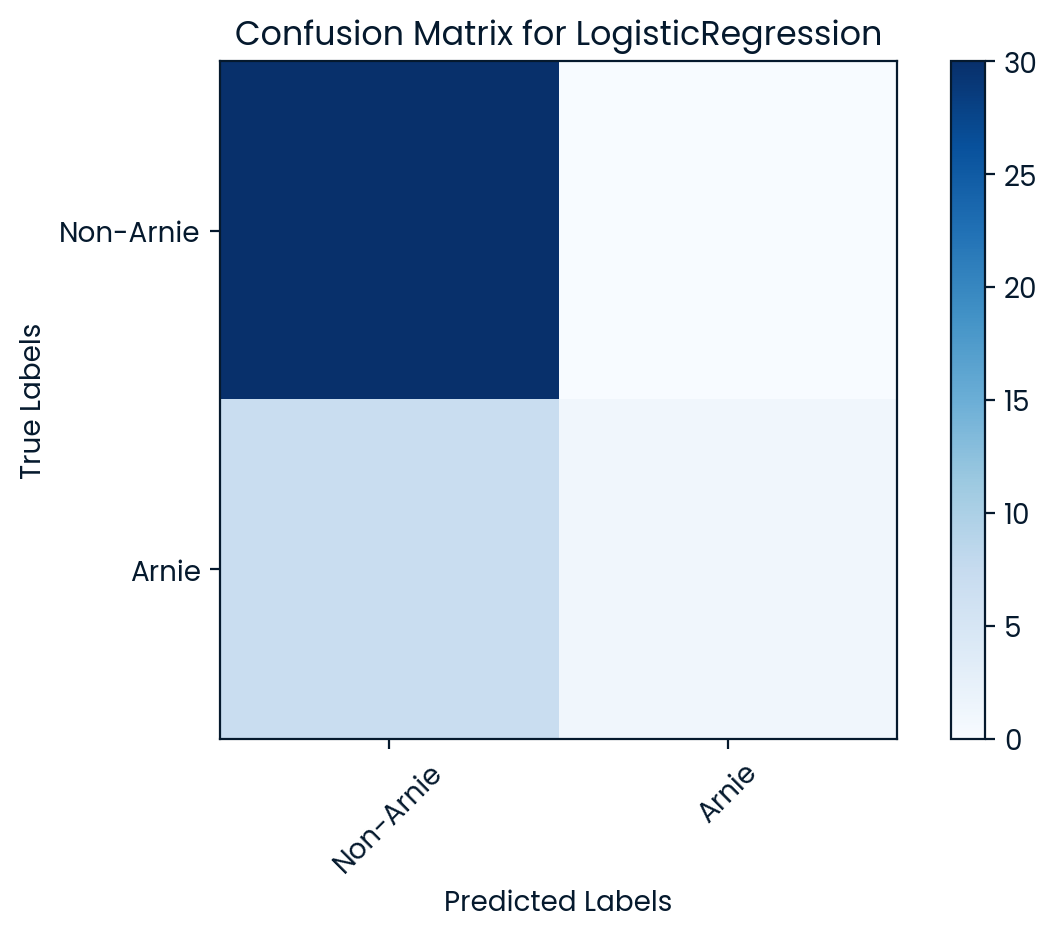

In [7]:

best_model_name = max(pipe_accuracies)
best_model_cv_score = max(pipe_accuracies.values())
best_model_info = pipe_params[best_model_name]

print(f"Best Model: {best_model_name}")
print(f"Best Model Parameters: {best_model_info}")
print(f"Best Model CV Score: {best_model_cv_score}")

y_pred = pipelines[best_model_name].predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

conf_mat = confusion_matrix(y_test, y_pred)
plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix for {best_model_name}')
plt.colorbar()
tick_marks = range(len(set(y_test)))
plt.xticks(tick_marks, ['Non-Arnie', 'Arnie'], rotation=45)
plt.yticks(tick_marks, ['Non-Arnie', 'Arnie'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()